In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merge.csv')
df_copy = df.copy()
df_copy.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)

In [3]:
print('Feature name || Total missing values')
print(df.isna().sum())


Feature name || Total missing values
Name                  0
Platform              0
Year_of_Release       0
Genre                27
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1994
Critic_Count       1994
User_Score         1948
User_Count         1948
Developer            27
Rating              151
dtype: int64


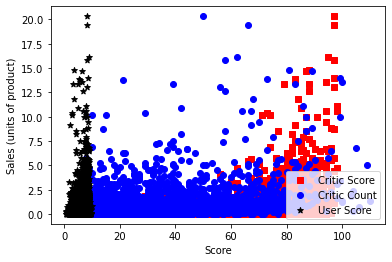

<function matplotlib.pyplot.show(close=None, block=None)>

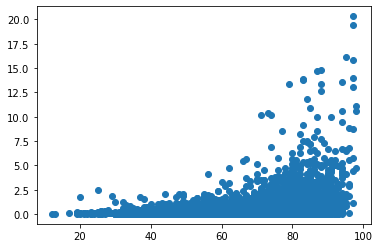

In [4]:
plt.scatter(x=df_copy['Critic_Score'],y=df_copy['Global_Sales'],c='r',marker='s',label='Critic Score')
plt.scatter(x=df_copy['Critic_Count'],y=df_copy['Global_Sales'],c='b',marker='o',label='Critic Count')
plt.scatter(x=df_copy['User_Score'],y=df_copy['Global_Sales'],c='k',marker='*',label='User Score')
#plt.scatter(x=df['User_Count'],y=df['Global_Sales'],c='y',marker='d',label='User Count')
plt.legend(numpoints=1,loc=4)
plt.xlabel('Score')
plt.ylabel('Sales (units of product)')
plt.show()

plt.scatter(x=df_copy['Critic_Score'],y=df_copy['Global_Sales'])
plt.show

In [5]:
X = df_copy.iloc[:, :].values
X = np.delete(X, 6, 1)

y = df_copy.iloc[:, 6:7].values

# Splitting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Saving name of the games in training and test set
games_in_training_set = X_train[:, 0]
games_in_test_set = X_test[:, 0]

# Dropping the column that contains the name of the games
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

In [6]:
imputer = SimpleImputer(strategy='mean')
X_train[:, [5 ,6, 7, 8]] = imputer.fit_transform(X_train[:, [5, 6, 7, 8]])
X_test[:, [5 ,6, 7, 8]] = imputer.transform(X_test[:, [5, 6, 7, 8]])


categorical_imputer = SimpleImputer(strategy = 'constant', fill_value = 'NA')
X_train[:, [0, 9]] = categorical_imputer.fit_transform(X_train[:, [0, 9]])
X_test[:, [0, 9]] = categorical_imputer.transform(X_test[:, [0, 9]])

In [7]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough') 
X_train = ct.fit_transform(X_train)
#ct.fit_transform(X_train)
#print(X_train.shape)
#print(X_train)
print(X_test)

[['Miscellaneous' 0.03 0.17 ... 6.991330774152272 151.30518234165066 'E']
 ['General' 0.44 0.36 ... 8.4 665.0 'M']
 ['Sports' 0.07 0.02 ... 5.4 7.0 'T']
 ...
 ['Action Adventure' 0.02 0.01 ... 8.8 4.0 'M']
 ['Action' 0.06 0.12 ... 5.8 113.0 'M']
 ['Simulation' 0.0 0.02 ... 8.0 47.0 'T']]


In [8]:

X_test = ct.transform(X_test)
print(X_test)

  (0, 23)	1.0
  (0, 43)	1.0
  (0, 50)	0.03
  (0, 51)	0.17
  (0, 53)	0.01
  (0, 54)	68.0
  (0, 55)	4.0
  (0, 56)	6.991330774152272
  (0, 57)	151.30518234165066
  (1, 19)	1.0
  (1, 46)	1.0
  (1, 50)	0.44
  (1, 51)	0.36
  (1, 53)	0.16
  (1, 54)	85.0
  (1, 55)	31.0
  (1, 56)	8.4
  (1, 57)	665.0
  (2, 37)	1.0
  (2, 49)	1.0
  (2, 50)	0.07
  (2, 51)	0.02
  (2, 54)	67.0
  (2, 55)	21.0
  (2, 56)	5.4
  :	:
  (1951, 57)	13.0
  (1952, 3)	1.0
  (1952, 46)	1.0
  (1952, 50)	0.02
  (1952, 51)	0.01
  (1952, 54)	53.0
  (1952, 55)	28.0
  (1952, 56)	8.8
  (1952, 57)	4.0
  (1953, 2)	1.0
  (1953, 46)	1.0
  (1953, 50)	0.06
  (1953, 51)	0.12
  (1953, 53)	0.01
  (1953, 54)	52.0
  (1953, 55)	33.0
  (1953, 56)	5.8
  (1953, 57)	113.0
  (1954, 36)	1.0
  (1954, 49)	1.0
  (1954, 51)	0.02
  (1954, 54)	86.0
  (1954, 55)	12.0
  (1954, 56)	8.0
  (1954, 57)	47.0


In [9]:
model = XGBRegressor(n_estimators = 300, learning_rate= 0.3)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [10]:
# Predicting test set results

y_pred = model.predict(X_test)

# Visualising actual and predicted sales
games_in_test_set = games_in_test_set.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)
predictions = np.concatenate([games_in_test_set, y_pred, y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Original_Global_Sales'])

In [11]:
predictions.to_csv("results.csv")

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.987
Root Mean Squared Error of the model : 0.109


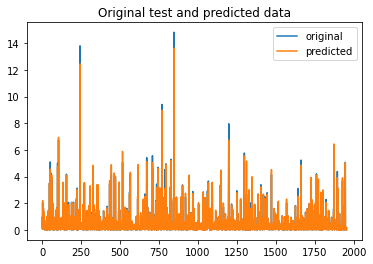

In [13]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Original test and predicted data")
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
df_copy = df.copy()
df_copy = df_copy[df_copy.Global_Sales >= 0.2]
df_copy["Genre"] = df_copy["Genre"].fillna(df_copy['Genre'].mode()[0])
df_copy['Rating'] = df_copy['Rating'].fillna(df_copy['Rating'].mode()[0])
df_copy['User_Score'] = df_copy['User_Score'].fillna(df_copy['User_Score'].median())
df_copy['User_Count'] = df_copy['User_Count'].fillna(df_copy['User_Count'].median())
df_copy['Critic_Score'] = df_copy['Critic_Score'].fillna(df_copy['Critic_Score'].median())
df_copy['Critic_Count'] = df_copy['Critic_Count'].fillna(df_copy['Critic_Count'].median())
df_copy = df_copy[~df_copy['Platform'].isin(['3DS', 'PlayStation Vita', 'Switch', 'Wii U','Dreamcast'])]
print(pd.value_counts(df_copy["Platform"]))
print(df_copy.isna().sum())
print(df_copy.columns.values)

PlayStation 2       835
Xbox 360            606
PlayStation 3       601
Wii                 441
DS                  414
Xbox                271
PlayStation 4       261
PSP                 221
Game Boy Advance    219
Xbox One            172
GameCube            154
PC                  134
PlayStation         119
Name: Platform, dtype: int64
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          8
Rating             0
dtype: int64
['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']


In [15]:
df_copy = pd.get_dummies(data=df_copy, columns=['Platform', 'Genre', 'Rating'])

df_copy.drop(columns = ['Developer', 'Publisher'], inplace = True)
y = df_copy["Global_Sales"].values
df_copy.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'], inplace = True)
X = df_copy.iloc[:, :].values
#X = np.delete(X, 6, 1)

print(X.shape)
print(y.shape)

# Splitting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Saving name of the games in training and test set
games_in_training_set = X_train[:, 0]
games_in_test_set = X_test[:, 0]

# Dropping the column that contains the name of the games
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

(4448, 59)
(4448,)


In [16]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
print(regressor.intercept_)
print(regressor.coef_)

38.87797391372712
[-1.94048334e-02  1.03576768e-02  3.02175304e-03 -3.74783324e-02
  2.18717780e-04  7.52804566e-03 -5.04441800e-02 -1.72438164e-01
 -3.07381887e-01 -4.75244848e-03  9.67741498e-02  3.63879776e-02
  1.06802908e-01  1.30671174e-01  9.88363744e-02 -1.85376397e-01
  6.28814192e-02  1.80511027e-01 -2.92889074e-01  2.25994025e-02
  6.24592485e-02 -9.33210055e-02 -8.85002206e-02 -5.25022769e-02
 -3.10580172e-02 -3.15084173e-02  1.26739944e-02 -2.50347494e-01
 -8.43561469e-02 -1.05508720e-01  2.12147751e-01 -4.99389722e-02
 -9.55916473e-03 -8.53262312e-03  1.00626389e+00  2.93444491e-02
  8.49297571e-02 -3.01602224e-01 -2.97726269e-01 -1.08769218e-01
  0.00000000e+00 -2.07168149e-01 -3.74971071e-01 -1.03418492e-01
 -4.04607513e-03  3.16465686e-01  8.92534191e-02  1.19754010e-02
 -1.15182252e-01 -8.42578458e-02 -1.11022302e-16  8.47050727e-01
  3.84478940e-01 -2.27487244e-02 -2.30566522e-02 -2.46169002e-01
 -4.01971731e-02 -5.23073885e-02]


In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

       Actual  Predicted
0    0.802002   0.343458
1    1.184790   0.864203
2    0.231112   0.328865
3    1.715598   0.590207
4    0.425268   0.519292
..        ...        ...
885  0.357674   0.360923
886  0.444686   0.381758
887  0.506818   0.627496
888  0.182322   0.302782
889  0.254642   0.424084

[890 rows x 2 columns]


In [30]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.336
Root Mean Squared Error of the model : 0.315
